In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb # there is something wrong with xgb
color = sns.color_palette()

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

('Train shape:', (4209, 378))
('Test shape:', (4209, 377))


In [3]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))

In [4]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [24]:
np.random.seed(42)
shuffle_index = np.random.permutation(train_df.shape[0]).tolist()
length = np.int(len(train_df) * 0.75)

In [25]:
training_set = train_df.reindex(shuffle_index)[:length]
cv_set = train_df.reindex(shuffle_index)[length:]

In [26]:
train_y = training_set['y'].values
train_X = training_set.drop(["ID", "y"], axis=1)
cv_X = cv_set.drop(['y', "ID"], axis=1)
cv_y = cv_set['y'].values

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=6, n_estimators=180, 
                                 learning_rate=0.015) 
gbrt.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=180, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [47]:
from sklearn import metrics

def R2_score(cv_y, prediction):
    R2_score = metrics.r2_score(cv_y, prediction)
    return R2_score

In [69]:
y_cv_pred = gbrt.predict(cv_X)
R2_score(cv_y, y_cv_pred)

0.59163608367748133

In [70]:
y_pred = gbrt.predict(train_X)
R2_score(train_y, y_pred)

0.6485841354429549

In [71]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_df[f].values)) 
        test_df[f] = lbl.transform(list(test_df[f].values))
        

test_X = test_df.drop(['ID'], axis=1)

In [97]:
y = pd.DataFrame(gbrt.predict(test_X))

In [98]:
y['ID'] = test_df['ID']
y.columns = ['y', 'ID']
y = y.reindex(columns=['ID','y'])

In [99]:
y[y['ID']==4214]

,ID,y
2111,4214,104.701911


In [62]:
test_df.shape

(4209, 377)

In [64]:
sample = pd.read_csv('sample_submission.csv')

In [65]:
sample[sample['ID']==4214]

,ID,y
2111,4214,100.669318


In [100]:
y.head()

,ID,y
0,1,77.567866
1,2,116.373181
2,3,83.425892
3,4,78.983710
4,5,111.874985


In [101]:
y.to_csv('prediction.csv', index=False)

### GBRT - 2  

In [102]:
gbrt_47 = GradientBoostingRegressor(max_depth=3, n_estimators=190, 
                                 learning_rate=0.015)
gbrt_47.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.015, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=190, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [103]:
y_cv_pred_47 = gbrt_47.predict(cv_X)
R2_score(cv_y, y_cv_pred_47)

0.60720189782519562

In [104]:
y_pred_47 = gbrt_47.predict(train_X)
R2_score(train_y, y_pred_47)

0.57302129384925715

In [105]:
y_47 = pd.DataFrame(gbrt_47.predict(test_X))
y_47['ID'] = test_df['ID']
y_47.columns = ['y', 'ID']
y_47 = y_47.reindex(columns=['ID','y'])
y_47.head()

,ID,y
0,1,88.476043
1,2,104.876394
2,3,87.978538
3,4,79.061123
4,5,110.958697


In [106]:
y_47.to_csv('prediction_47.csv', index=False)

## Random Forest and Feature Selection

In [107]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=180, max_depth=10, n_jobs=2)
rfr.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=180, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [108]:
rfr_y_pred = rfr.predict(train_X)
R2_score(train_y, rfr_y_pred)

0.71313695526287857

In [109]:
rfr_cv_y = rfr.predict(cv_X)
R2_score(cv_y, rfr_cv_y)

0.58055177140045378

In [110]:
rfr_2 = RandomForestRegressor(n_estimators=180, max_depth=8, n_jobs=2)
rfr_2.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=180, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [111]:
rfr_cv_y_2 = rfr_2.predict(cv_X)
R2_score(cv_y, rfr_cv_y_2)

0.59471956069534726

In [122]:
importance = rfr_2.feature_importances_
feat_names = train_X.columns.values

In [127]:
std = np.std([tree.feature_importances_ for tree in rfr_2.estimators_], axis=0)
indices = np.argsort(importance)[::-1][:30]

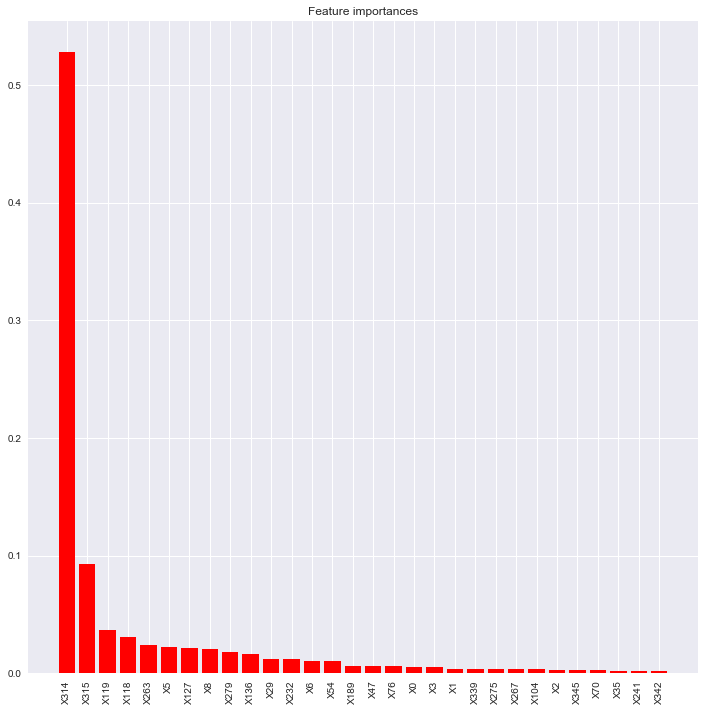

In [129]:
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
#plt.xlim([-1, len(indices)])
plt.show()

In [128]:
indices

array([305, 306, 115, 114, 255,   5, 122,   7, 271, 131,  26, 224,   6,
        51, 182,  44,  72,   0,   3,   1, 330, 267, 259, 100,   2, 336,
        67,  32, 233, 333])

In [164]:
rfr_3 = RandomForestRegressor(n_estimators=250, max_depth=8, min_samples_leaf=4, 
                              max_features=0.2, n_jobs=-1, random_state=0)
rfr_3.fit(train_X, train_y)
rfr_cv_y_3 = rfr_3.predict(cv_X)
R2_score(cv_y, rfr_cv_y_3)

0.60693681025213952

In [151]:
importance_3 = rfr_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_3.estimators_], axis=0)
indices = np.argsort(importance_3)[::-1][:200]

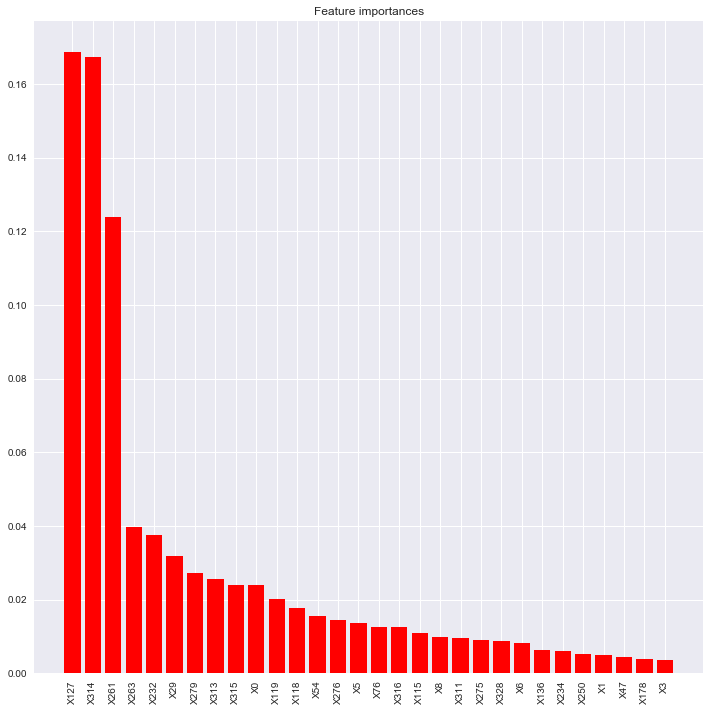

In [140]:
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance_3[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
#plt.xlim([-1, len(indices)])
plt.show()

In [152]:
train_X_imp = train_X[feat_names[indices]]
cv_X_imp = cv_X[feat_names[indices]]

In [168]:
rfr_4 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=4, 
                              max_features=0.2, n_jobs=-1, random_state=0)
rfr_4.fit(train_X, train_y)
rfr_cv_y_4 = rfr_4.predict(cv_X)
print(R2_score(cv_y, rfr_cv_y_4))
rfr_cv_y_4 = rfr_4.predict(train_X)
print(R2_score(train_y, rfr_cv_y_4))

0.605435686518
0.569013009314


In [169]:
rfr_5 = RandomForestRegressor(n_estimators=150, max_depth=5, min_samples_leaf=4, 
                              max_features=0.2, n_jobs=-1, random_state=0)
rfr_5.fit(train_X, train_y)
rfr_cv_y_5 = rfr_5.predict(cv_X)
print(R2_score(cv_y, rfr_cv_y_5))
rfr_cv_y_5 = rfr_5.predict(train_X)
print(R2_score(train_y, rfr_cv_y_5))

0.605335644526
0.569284759647


In [170]:
rfr_6 = RandomForestRegressor(n_estimators=200, max_depth=5,  n_jobs=-1)
rfr_6.fit(train_X, train_y)
rfr_cv_y_6 = rfr_6.predict(cv_X)
print(R2_score(cv_y, rfr_cv_y_6))
rfr_cv_y_6 = rfr_6.predict(train_X)
print(R2_score(train_y, rfr_cv_y_6))

0.606695020211
0.597421564991


In [171]:
rfr_7 = RandomForestRegressor(n_estimators=180, max_depth=6, n_jobs=-1)
rfr_7.fit(train_X, train_y)
rfr_cv_y_7 = rfr_7.predict(cv_X)
print(R2_score(cv_y, rfr_cv_y_7))
rfr_cv_y_7 = rfr_7.predict(train_X)
print(R2_score(train_y, rfr_cv_y_7))

0.601103965025
0.616337748198


GBRT with important features

In [159]:
gbrt_50 = GradientBoostingRegressor(max_depth=4, n_estimators=190, 
                                 learning_rate=0.016)
gbrt_50.fit(train_X_imp, train_y)
y_cv_pred_50 = gbrt_50.predict(cv_X_imp)
R2_score(cv_y, y_cv_pred_50)

0.60236888361071705